# Crop Damage Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Crop Damage Prediction/train_yaOffsB.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
df.shape

(88858, 10)

In [7]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [9]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

### Data Preprocessing

In [10]:
# Drop ID Column
df = df.drop(columns = ["ID"])
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


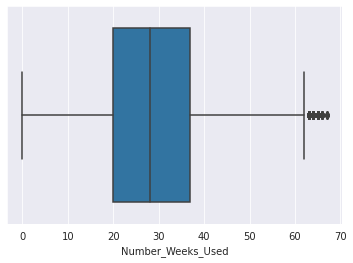

In [11]:
sns.boxplot(x = df.Number_Weeks_Used)
plt.show()

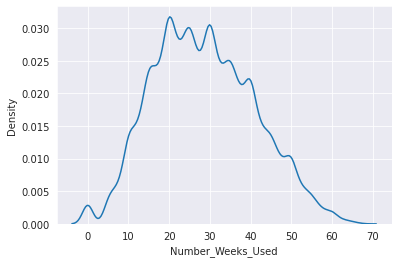

In [12]:
sns.kdeplot(x = df.Number_Weeks_Used)
plt.show()

In [13]:
df["Number_Weeks_Used"].describe()

count    79858.000000
mean        28.623970
std         12.391881
min          0.000000
25%         20.000000
50%         28.000000
75%         37.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64

In [14]:
outlier = df["Number_Weeks_Used"].describe()["75%"] + (df["Number_Weeks_Used"].describe()["75%"] - df["Number_Weeks_Used"].describe()["25%"]) * 1.5

In [15]:
df["Number_Weeks_Used"] = np.where(df["Number_Weeks_Used"] > outlier, outlier, df["Number_Weeks_Used"])

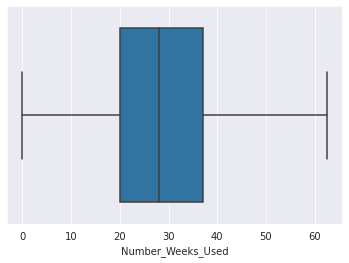

In [16]:
sns.boxplot(x = df.Number_Weeks_Used)
plt.show()

In [17]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 30)
imputer.fit(df.iloc[:, :-1])
df_imputed = imputer.transform(df.iloc[:, :-1])

In [19]:
df_imputed = pd.DataFrame(df_imputed, columns = df.iloc[:, :-1].columns)
df_imputed.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [20]:
df_imputed["Crop_Damage"] = df["Crop_Damage"]

In [21]:
df_imputed.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [22]:
df = df_imputed.copy()

In [23]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [24]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

### Question: In which season crop damage is happening more?
<br>Note: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

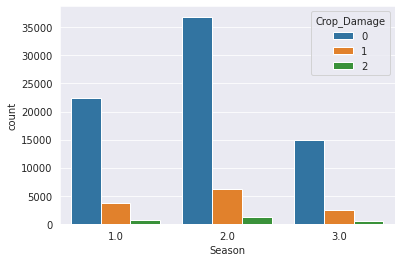

In [25]:
sns.countplot(x = df["Season"], hue = df["Crop_Damage"])
plt.show()

In season 2 crop damage is happening more compared to other seasons

### Question: Average Insect Count in each crop damage type 

In [26]:
df.groupby("Crop_Damage").mean()["Estimated_Insects_Count"]

Crop_Damage
0    1315.707387
1    1839.106200
2    1731.111976
Name: Estimated_Insects_Count, dtype: float64

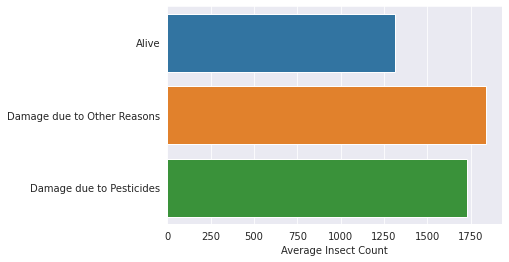

In [27]:
sns.barplot(y = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"],x = df.groupby("Crop_Damage").mean()["Estimated_Insects_Count"])
plt.xlabel("Average Insect Count")
plt.show()

In Damage due to Other Reasons Average insect count is more

### Question: Which crop type more crop damage is happening

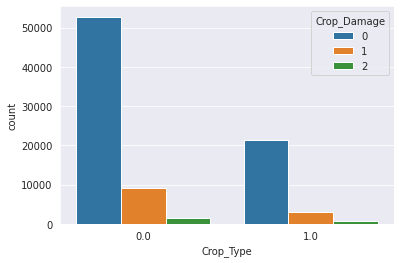

In [28]:
sns.countplot(x = df["Crop_Type"], hue = df["Crop_Damage"])
plt.show()

### Question: In Which soil type more crop damage is happening

In [29]:
ct = pd.crosstab(df["Soil_Type"], df["Crop_Damage"])
ct

Crop_Damage,0,1,2
Soil_Type,,,
0.0,39841,6953,1330
1.0,34397,5354,983


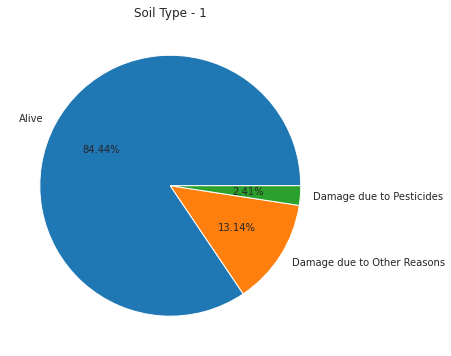

In [30]:
plt.figure(figsize = (6,6))
plt.pie(ct.iloc[1, :], labels = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"], autopct = "%1.2f%%")
plt.title("Soil Type - 1")
plt.show()

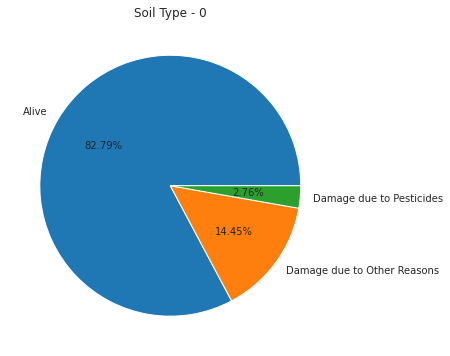

In [31]:
plt.figure(figsize = (6,6))
plt.pie(ct.iloc[0, :], labels = ["Alive", "Damage due to Other Reasons", "Damage due to Pesticides"], autopct = "%1.2f%%")
plt.title("Soil Type - 0")
plt.show()

In [32]:
X = df.drop(columns = ["Crop_Damage"])
y = df.Crop_Damage

In [33]:
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

### Building Artificial Neural Network Model

In [50]:
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

In [38]:
# convert y to categorical
y = keras.utils.to_categorical(y)

In [39]:
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [58]:
model = models.Sequential()
model.add(Flatten())
model.add(Dense(units = 200, activation = "relu"))
model.add(Dense(units = 200, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [60]:
model.fit(x = X, y = y, batch_size = 16, epochs = 100)

Epoch 1/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4875 - accuracy: 0.8340
Epoch 2/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4826 - accuracy: 0.8354
Epoch 3/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4761 - accuracy: 0.8354
Epoch 4/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4719 - accuracy: 0.8355
Epoch 5/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4702 - accuracy: 0.8354
Epoch 6/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4669 - accuracy: 0.8354
Epoch 7/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4660 - accuracy: 0.8354
Epoch 8/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4641 - accuracy: 0.8355
Epoch 9/100
5554/5554 [==============================] - 12s 2ms/step - loss: 0.4617 - accuracy: 0.8362
Epoch 10/100
5554/5554 [==============================] - 12s 2m

### Submissions

In [61]:
df_test = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Crop Damage Prediction/test_pFkWwen.csv")
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [62]:
df_test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [63]:
df_test = df_test.drop(columns = ["ID"])
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [64]:
df_test = imputer.transform(df_test)

In [65]:
df_test = pd.DataFrame(df_test, columns = X.columns)
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188.0,1.0,1.0,1.0,0.0,11.9,0.0,2.0
1,410.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
2,626.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,731.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,789.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [66]:
df_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [67]:
predictions = model.predict(df_test)

In [73]:
predictions = [np.argmax(i) for i in predictions]

In [75]:
submission = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Crop Damage Prediction/sample_submission_O1oDc4H.csv")
submission.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [76]:
submission["Crop_Damage"] = predictions

In [77]:
submission.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [80]:
submission.to_csv("ANN_submissions.csv", index = False)

## Competition Score : 0.82594531985232